In [1]:
import networkx as nx

def group_topological_sort(G):
    # 初始化
    in_degree = dict(G.in_degree())
    zero_in_degree = [n for n,d in in_degree.items() if d == 0]
    groups = []
    seen = set()

    while zero_in_degree:
        # 当前超步的节点
        current_group = []

        # 处理当前所有入度为0的节点
        for node in zero_in_degree:
            if node not in seen:
                current_group.append(node)
                seen.add(node)

        # 更新图,重新计算入度
        next_zero_in_degree = []
        for node in current_group:
            # 更新其邻居节点的入度
            for neighbor in G.neighbors(node):
                in_degree[neighbor] -= 1
                if in_degree[neighbor] == 0:
                    next_zero_in_degree.append(neighbor)

        groups.append(current_group)
        zero_in_degree = next_zero_in_degree

    return groups

# 示例使用
G = nx.DiGraph()
edges = [(1,4), (1,3), (2,3), (3,6), (4,6), (4,7), (5,7)]
G.add_edges_from(edges)

groups = group_topological_sort(G)
for i, group in enumerate(groups):
    print(f"Superstep {i}: {group}")

Superstep 0: [1, 2, 5]
Superstep 1: [4, 3]
Superstep 2: [7, 6]


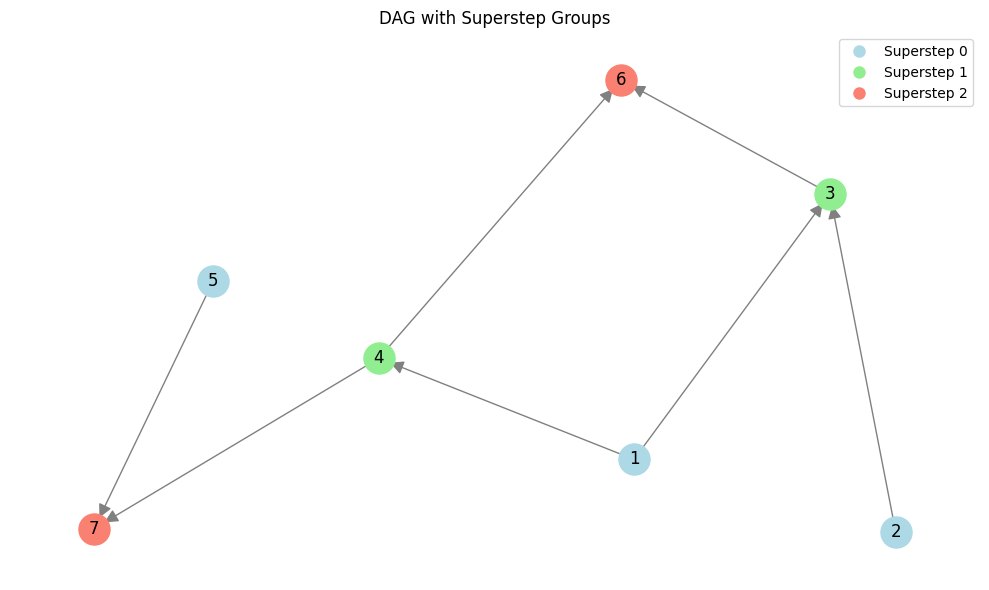

Superstep 0: [1, 2, 5]
Superstep 1: [4, 3]
Superstep 2: [7, 6]


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建图
G = nx.DiGraph()
edges = [(1,4), (1,3), (2,3), (3,6), (4,6), (4,7), (5,7)]
G.add_edges_from(edges)

# 获取分组信息
groups = group_topological_sort(G)

# 为不同组设置不同颜色
node_colors = []
node_groups = {}
colors = ['lightblue', 'lightgreen', 'salmon', 'yellow']

for i, group in enumerate(groups):
    for node in group:
        node_groups[node] = i

# 设置绘图参数
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=1, iterations=50)  # k控制节点间距

# 绘制边
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)

# 按组绘制节点
for i, group in enumerate(groups):
    nx.draw_networkx_nodes(G, pos,
                          nodelist=group,
                          node_color=colors[i],
                          node_size=500)

# 添加节点标签
nx.draw_networkx_labels(G, pos)

# 添加标题和图例
plt.title("DAG with Superstep Groups")

# 创建图例
legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                             markerfacecolor=colors[i],
                             markersize=10,
                             label=f'Superstep {i}')
                  for i in range(len(groups))]
plt.legend(handles=legend_elements)

plt.axis('off')
plt.tight_layout()
plt.show()

# 打印每个超步的节点
for i, group in enumerate(groups):
    print(f"Superstep {i}: {group}")